In [1]:
#Standard
import time
import numpy as np
import pandas as pd

# file manipulation
import os
import json

# word embedings
import gensim
from gensim import corpora, models, similarities

# Word Counter
from collections import Counter

# Visualisation
import matplotlib.pyplot as plt

# import
import sklearn

#read 
from ast import literal_eval

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Load tweets to pandas
DataPath = 'C:\\Users\\Vojta-Acer\\Desktop\\Diplomka\\dataProcessed\\tweetsAAPL.csv'
tweetsClean = pd.read_csv(DataPath)

# convert column values to lists of words
tweetsClean['lemmas'] = tweetsClean['lemmas'].apply(literal_eval)
tweetsClean['tokens'] = tweetsClean['tokens'].apply(literal_eval)

In [62]:
## 1. Visualisation: Price-Tweets time series 
# index tweets
tweets = tweetsClean.copy()

# create time variables
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%Y-%m-%d %H:%M:%S')
tweets['date'] = tweets['created_at'].astype(str).str[:10]
tweets['hour'] = tweets['created_at'].astype(str).str[11:13]
tweets['minute'] = tweets['created_at'].astype(str).str[14:16]
tweets['5min'] = (tweets['minute'].astype(int)//5)*5

# Indexing
tweets.set_index(['date', 'hour', '5min' ,'minute', 'id'], inplace = True)

# Tweet count
tweetCount = tweets['created_at'].groupby(level=['date']).count()
tweetCount = tweetCount.rename('AAPL Tweet count')
tweetCount = tweetCount.to_frame()

# Apple prices
applePrice = pd.read_csv('applePrice.csv')
applePrice['Date'] = pd.to_datetime(applePrice['Date'], format='%m/%d/%Y')
applePrice.set_index('Date', inplace = True)

merged = tweetCount.join(applePrice)
merged.to_csv('appleTimeline.csv')

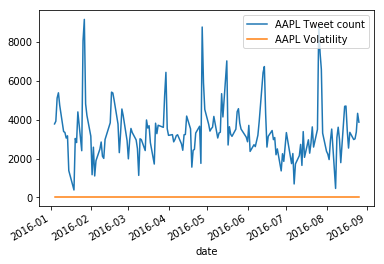

In [67]:
x = merged.copy()
RET = x['Close'].pct_change()
x['AAPL Volatility'] = RET*RET
x = x[RET.notnull()]
x[['AAPL Tweet count', 'AAPL Volatility']].plot()